In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
from bokeh.plotting import figure, output_notebook, show, save
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Pastel2, PiYG, Paired, Plasma256
from bokeh.io import output_notebook, output_file

output_notebook()

Loading BokehJS ...

In [4]:
df = pd.read_csv(r"C:\Users\Anna\CS project\England_S.txt", sep='\ +', skiprows=5, header=0, engine='python')
df.head()

,jan,year,feb,year.1,mar,year.2,apr,year.3,may,year.4,...,win,year.12,spr,year.13,sum,year.14,aut,year.15,ann,year.16
0,167.8,2014,142.9,2024,152.1,1947,137.1,2012,120.4,1878,...,413.6,2014,275.4,1979,366.2,1879,418.2,2000,1063.9,1872
1,142.3,1988,136.6,2020,126.2,1981,134.8,2000,119.5,2007,...,380.1,1915,269.5,1981,362.5,1912,408.1,1960,1046.5,2012
2,142.1,1995,131.9,1923,123.6,2023,119.2,1998,119.3,1967,...,369.2,1990,254.3,1947,327.7,2012,395.3,1852,1044.8,1960
3,141.1,1939,126.3,1990,112.2,1914,104.6,1920,118.3,1932,...,352.8,1877,253.3,1983,325.7,1860,363.2,1841,1038.2,2000
4,137.2,1943,125.9,2014,109.9,1979,101.6,1983,112.9,1843,...,344.0,1995,247.6,2024,298.4,1852,354.3,1976,1034.1,1852


In [6]:
df2 = df.drop(['win', 'year.12', 'spr', 'year.13', 'sum', 'year.14', 'aut', 'year.15', 'ann', 'year.16'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jan      189 non-null    float64
 1   year     189 non-null    int64  
 2   feb      189 non-null    float64
 3   year.1   189 non-null    int64  
 4   mar      189 non-null    float64
 5   year.2   189 non-null    int64  
 6   apr      189 non-null    float64
 7   year.3   189 non-null    int64  
 8   may      189 non-null    float64
 9   year.4   189 non-null    int64  
 10  jun      189 non-null    object 
 11  year.5   189 non-null    int64  
 12  jul      189 non-null    object 
 13  year.6   189 non-null    int64  
 14  aug      189 non-null    object 
 15  year.7   189 non-null    int64  
 16  sep      189 non-null    object 
 17  year.8   189 non-null    int64  
 18  oct      189 non-null    object 
 19  year.9   189 non-null    int64  
 20  nov      189 non-null    object 
 21  year.10  189 non

In [8]:
df_jan = df2[['jan','year']].set_index('year')
df_feb = df2[['feb','year.1']].set_index('year.1')
df_mar = df2[['mar','year.2']].set_index('year.2')
df_apr = df2[['apr','year.3']].set_index('year.3')
df_may = df2[['may','year.4']].set_index('year.4')
df_jun = df2[['jun','year.5']].set_index('year.5')
df_jul = df2[['jul','year.6']].set_index('year.6')
df_aug = df2[['aug','year.7']].set_index('year.7')
df_sep = df2[['sep','year.8']].set_index('year.8')
df_oct = df2[['oct','year.9']].set_index('year.9')
df_nov = df2[['nov','year.10']].set_index('year.10')
df_dec = df2[['dec','year.11']].set_index('year.11')
new_df = df_jan.join(df_feb).join(df_mar).join(df_apr).join(df_may).join(df_jun).join(df_jul).join(df_aug).join(df_sep).join(df_oct).join(df_nov).join(df_dec)
new_df.sort_index(ascending=False, inplace=True)
new_df = new_df.reset_index()
new_df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2024,70.9,142.9,95.6,73.8,78.2,---,---,---,---,---,---,---
1,2023,85.1,9.7,123.6,66.8,42.7,34.8,101.8,63.3,68.4,142.7,107.5,128.4
2,2022,28.3,78.1,43.4,19.3,48.0,44.3,10.7,32.1,71.6,94.4,151.1,86.1
3,2021,114.4,62.0,37.5,10.2,110.4,62.1,77.0,41.9,57.9,122.5,25.7,84.8
4,2020,72.9,136.6,47.3,36.7,5.5,79.2,49.1,103.8,40.8,146.1,57.2,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1840,83.2,52.2,7.9,12.4,63.3,39.0,60.1,47.6,69.1,41.0,119.7,15.0
185,1839,48.2,50.7,55.2,38.9,27.5,96.4,115.5,65.7,106.4,79.2,116.3,87.2
186,1838,19.6,62.9,38.3,36.5,45.7,92.5,50.7,49.0,65.1,66.7,119.1,57.0
187,1837,79.0,80.1,23.3,42.8,29.7,42.9,53.5,93.1,53.2,65.2,60.1,60.3


In [14]:
every_20 = new_df[::20]

In [18]:
# Transform the DataFrame to long format
df_long = pd.melt(every_20, id_vars=['year'], var_name='month', value_name='rainfall')
#Dropping rows with Nan
df_long.dropna(inplace=True)

#Convert the months to categorical datatype so they are in order
df_long['month'] = pd.Categorical(df_long['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
df_long.head()


,year,month,rainfall
0,2024,jan,70.9
1,2004,jan,103.8
2,1984,jan,125.7
3,1964,jan,20.6
4,1944,jan,59.0


In [20]:
#Bokeh scatter
source = ColumnDataSource(df_long)

# Choosing colour pallet:
years = df_long['year'].unique()
palette = Paired[len(years)]

# Making the figure
p = figure(title='Mean monthly rainfall',
           x_axis_label='Month',
           y_axis_label='Rainfall',
           tooltips=[('Year','@year'),('Month','@month'),('rainfall','@rainfall')],
           x_range=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
          )

# Making a scatter plot
for i, year in enumerate(years):
    year_data = df_long[df_long['year']== year]
    source = ColumnDataSource(year_data)
    p.scatter(x='month', y='rainfall', source=source, legend_label=str(year), color=palette[i], size=8)
    p.line(x='month', y='rainfall', source=source, legend_label=str(year), color=palette[i], line_width=2)

# Add the legend
p.legend.title = 'Year'
p.legend.location = 'top_left'

show(p)

#output_file("C:\\Users\\CS project\\cs_rainmean_plot.html")
#save(p)

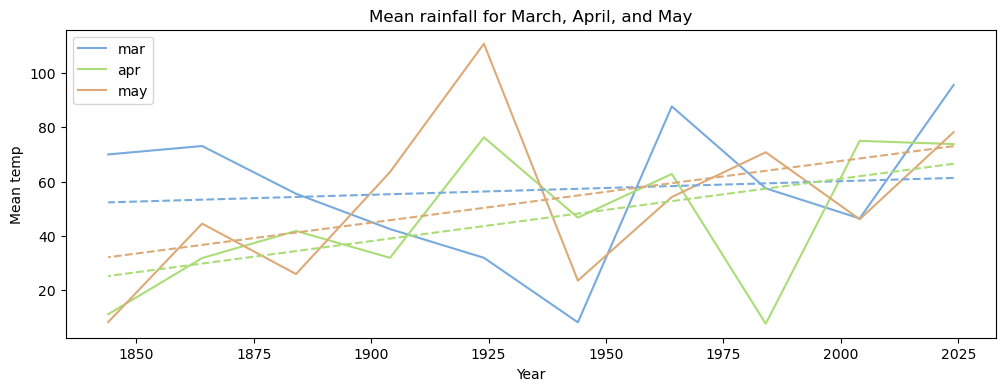

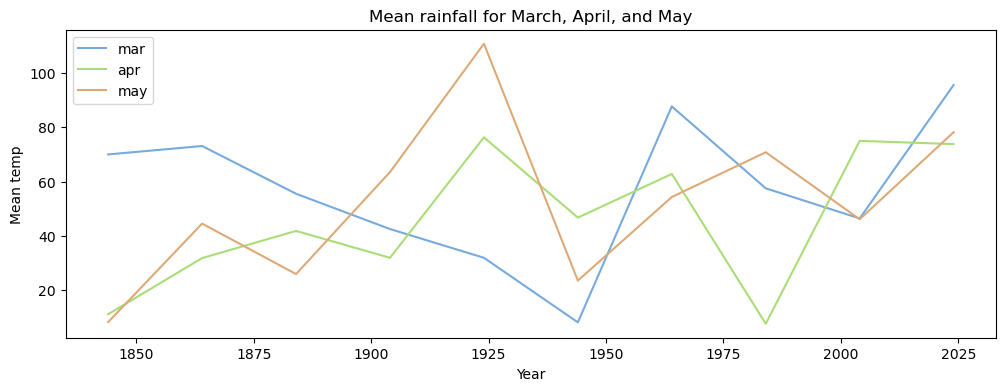

In [28]:
# Plotting
ax = every_20.plot(x='year', y=['mar', 'apr', 'may'], kind='line', figsize=(12, 4), color=['#77aadd', '#aadd77', '#ddaa77'],
                    ylabel='Mean temp', xlabel='Year')
ax.set_title('Mean rainfall for March, April, and May')

# Plotting
ax2 = every_20.plot(x='year', y=['mar', 'apr', 'may'], 
                    kind='line', figsize=(12, 4),
                    color=['#77aadd','#aadd77','#ddaa77'], 
                    ylabel='Mean temp', 
                    xlabel='Year')

# Calculate regression lines
months = ['mar', 'apr', 'may']
colors = ['#77aadd','#aadd77','#ddaa77']

for month, color in zip(months, colors):
    x = every_20['year']
    y = every_20[month]
    coef = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (linear regression)
    regression_line = np.polyval(coef, x)
    ax.plot(x, regression_line, linestyle='--', color=color)

# Customize the plot
ax2.set_title('Mean rainfall for March, April, and May')
ax2.legend(loc='upper left');